In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy.interpolate import UnivariateSpline
from scipy import interpolate
import scipy.stats
import itertools
#import wquantiles as wq
from sklearn.metrics import confusion_matrix

In [3]:
input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/PID_level6_cleanedpulses_IC19_E5to200_60000kmax_variableevtperbin_LRe-3DROPe-.5EPOCHS200/prediction_values_36epochs.hdf5"
f = h5py.File(input_file1, "r")
list(f.keys())
truth1 = f["Y_test_use"][:]
predict1 = f["Y_predicted"][:]
try:
    info1 = f["additional_info"][:]
except:
    info1 = None
try:
    raw_weights1 = f["weights_test"][:]
except:
    raw_weights1 = None
f.close()
del f

In [4]:
efactor = 100
cnn_prob_track = np.array(predict1[:,:,0][-1])/efactor

true_energy1 = np.array(truth1[:,0])*efactor
true_zenith1 = np.array(truth1[:,1])
true_azimuth1 = np.array(truth1[:,2])
true_coszenith1 = np.cos(true_zenith1)
true_x1 = np.array(truth1[:,4])
true_y1 = np.array(truth1[:,5])
true_z1 = np.array(truth1[:,6])
true_CC1 = np.array(truth1[:,11])
true_isCC1 = true_CC1 == 1
true_track1 = np.array(truth1[:,8])
true_isTrack1 = np.array(true_track1,dtype=bool)
true_PID1 = truth1[:,9]

muon_mask_test1 = (true_PID1) == 13
true_isMuon1 = np.array(muon_mask_test1,dtype=bool)
numu_mask_test1 = (true_PID1) == 14
true_isNuMu1 = np.array(numu_mask_test1,dtype=bool)
nue_mask_test1 = (true_PID1) == 12
true_isNuE1 = np.array(nue_mask_test1,dtype=bool)
nutau_mask_test1 = (true_PID1) == 16
true_isNuTau1 = np.array(nutau_mask_test1,dtype=bool)
nu_mask1 = np.logical_or(np.logical_or(numu_mask_test1, nue_mask_test1), nutau_mask_test1)
true_isNu1 = np.array(nu_mask1,dtype=bool)

weights1 = raw_weights1[:,8]

numu_files1 =97 #50 #99
nue_files1 = 91 #23 #92
muon_files1 = 1999 #17992
nutau_files1 = 1
if weights1 is not None:
    if sum(true_isNuMu1) > 1:
        print("NuMu:",sum(true_isNuMu1),sum(weights1[true_isNuMu1]))
        weights1[true_isNuMu1] = weights1[true_isNuMu1]/numu_files1
        print(sum(weights1[true_isNuMu1]))
    if sum(true_isNuE1) > 1:
        print("NuE:",sum(true_isNuE1),sum(weights1[true_isNuE1]))
        weights1[true_isNuE1] = weights1[true_isNuE1]/nue_files1
        print(sum(weights1[true_isNuE1]))
    if sum(true_isMuon1) > 1:
        print("Muon:",sum(true_isMuon1),sum(weights1[true_isMuon1]))
        weights1[true_isMuon1] = weights1[true_isMuon1]/muon_files1
        print(sum(weights1[true_isMuon1]))
    if sum(nutau_mask_test1) > 1:
        print("NuTau:",sum(true_isNuTau1),sum(weights1[true_isNuTau1]))
        weights1[true_isNuTau1] = weights1[true_isNuTau1]/nutau_files1
        print(sum(weights1[true_isNuTau1]))
        
weights_squared1 = weights1*weights1

NuMu: 271483 0.13977261194112145
0.001440954762279603
NuE: 277676 0.04075153956452352
0.00044781911609365874


In [7]:
true_all = true_energy1 > 0

Masking, using 1.000000 of input
303056 246103 549159
Events predicted to be track:  97661 number of true tracks there:  67357 number of true cascades there:  30304


(0.59272945, 0.5769111514091492)

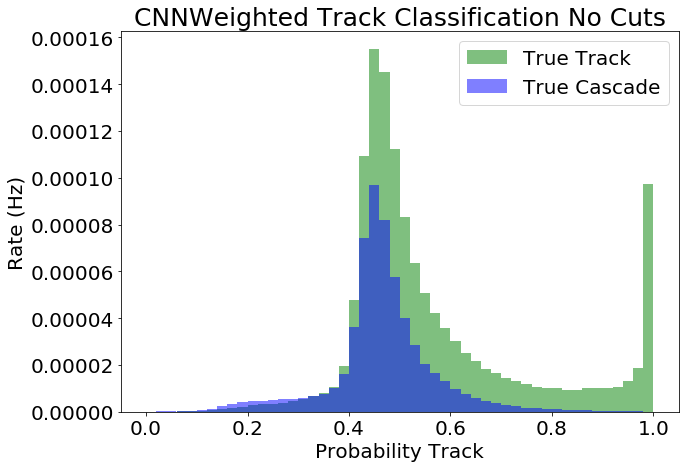

In [10]:
from PlottingFunctionsClassification import plot_classification_hist
from PlottingFunctionsClassification import ROC
save=False
save_folder=None

plot_classification_hist(true_isTrack1,cnn_prob_track,mask=true_all, mask_name="No Cuts", 
                         units="",bins=50,weights=weights1, log=False,save=save,
                         save_folder_name=save_folder,name_prob1 = "Track", name_prob0 = "Cascade",
                         notebook=True)

1.0
Fraction of true tracks: 0.448


(0.59272945, 0.5769111514091492)

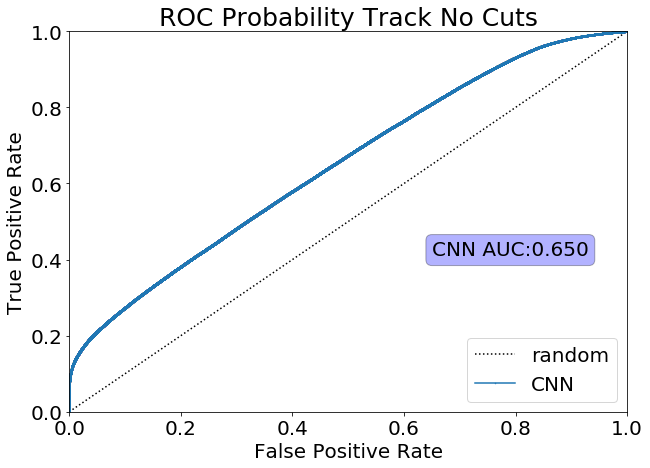

In [12]:
ROC(true_isTrack1,cnn_prob_track,mask=true_all,mask_name="No Cuts",save=save,
        save_folder_name=save_folder,variable="Probability Track",notebook=True)